In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Mid Point Rule (Implicit)

$$y_{n+1} = y_n + hf(t_n + \frac{h}{2}, y_n + \frac{h}{2}f(t_n,y_n))$$

In [2]:
def midPoint(time,h,f = []):
    for t in time:
        y = f[-1]
        s1 = function(t,y)
        s2 = function(t+h/2,y+h*s1/2)
        f.append(y + h*s2)
    return f[:len(time)]

### Runge Kutta Method

$$
y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)\\
k_1 = f(t_n,y_n) \\
k_2 = f(t_n + \frac{h}{2}, y_n + h\frac{k_1}{2})\\
k_3 = f(t_n + \frac{h}{2}, y_n + h\frac{k_2}{2})\\
k_4 = f(t_n + h, y_n + hk_3)
$$

In [3]:
def RungeKutta(time,h,f = []):
    for t in time:
        y = f[-1]
        k1 = function(t,y)
        k2 = function(t+h/2,y+h*k1/2)
        k3 = function(t+h/2,y+h*k2/2)
        k4 = function(t+h,y+h*k3)
        f.append(y + (k1 + 2*k2 + 2*k3 + k4)*h/6)
    return f[:len(time)]    

Again including the Euler's Function for comparison

In [4]:
def Euler(time,h,f = []):
    for t in time:
        y = f[-1]
        f.append(y + h*function(t,y))
    return f[:len(time)]

In [5]:
def function(t,y):
    return y
def trueSolution(t,y):
    return np.exp(t)

In [6]:
t0 = 0
tn = 4

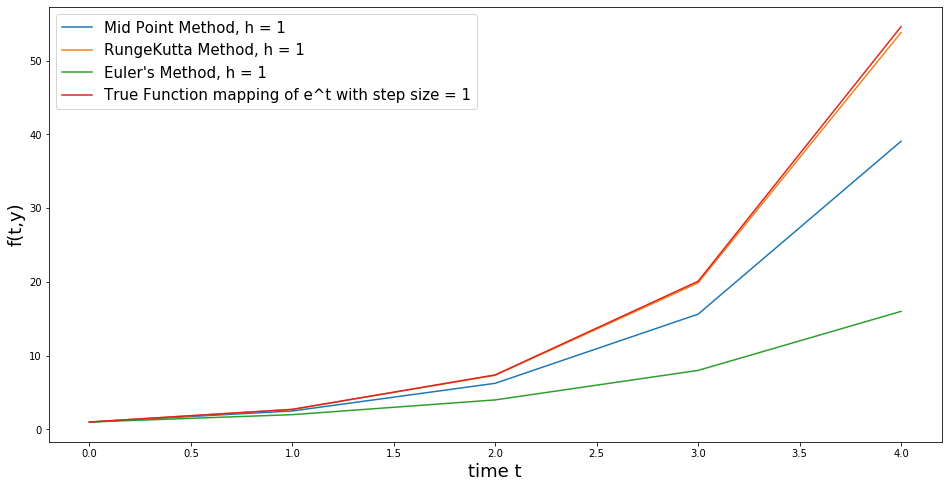

In [7]:
h = 1
time = np.arange(t0,tn+h,h)
f = [1] #initial condition f(0) = 1

fig = plt.figure(figsize = (16,8))
plt.plot(time,midPoint(time,h,[1]),label = "Mid Point Method, h = "+str(h))
plt.plot(time,RungeKutta(time,h,[1]),label = "RungeKutta Method, h = "+str(h))
plt.plot(time,Euler(time,h,[1]),label = "Euler's Method, h = "+str(h))
plt.plot(time,trueSolution(time,None), label = "True Function mapping of e^t with step size = "+str(h))
plt.legend(loc='upper left',prop ={'size': 15})
plt.xlabel("time t",fontsize = 18)
plt.ylabel("f(t,y)",fontsize = 18)
plt.show()

### Solving other differential equations numerically using Euler's Method

We now try plotting numerical solutions to two other differential equations using our Euler's method: 

1. dy/dt = 1/y, Initial Condition y(0) = $\sqrt2$
2. dy/dt = $ \sqrt{1 - y^2}$, Initial Condition y(0) = 0


### Solving 1. dy/dt = 1/y, Initial Condition y(1) = $\sqrt2$
  
$$
\frac{dy}{dt} = \frac{1}{y} \\
ydy = dt \\
\int ydy = \int dt \\
\frac{y^2}{2} = t + c\\
y = \sqrt{2t} \\
(c = 0\, satisfies\, the\, initial\, condition)
$$

In [8]:
def function(t,y):
    return 1/y
def trueSolution1(t,y):
    return (2*t)**0.5

t0 = 1
tn = 5
f = [2**0.5] #initial condition

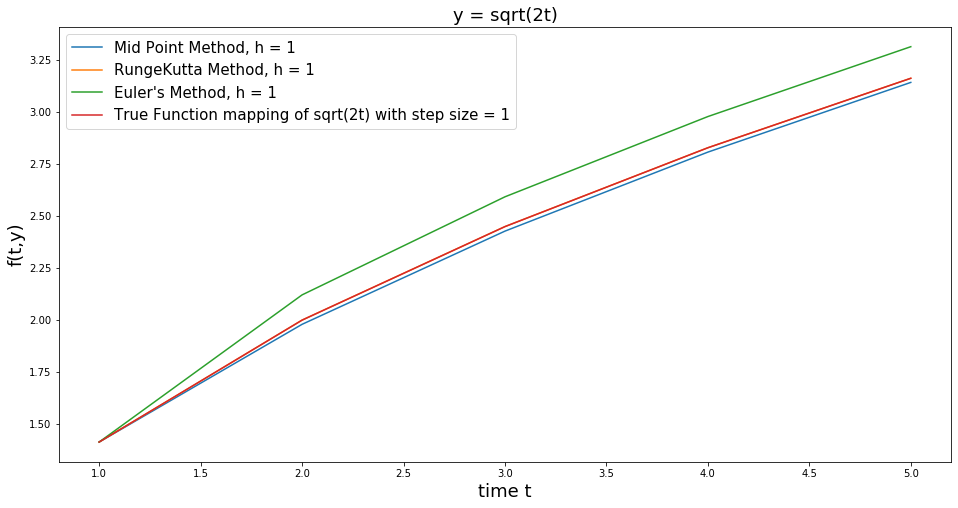

In [9]:
h = 1
time = np.arange(t0,tn+h,h)

fig = plt.figure(figsize = (16,8))
plt.plot(time,midPoint(time,h,[2**0.5]),label = "Mid Point Method, h = "+str(h))
plt.plot(time,RungeKutta(time,h,[2**0.5]),label = "RungeKutta Method, h = "+str(h))
plt.plot(time,Euler(time,h,[2**0.5]),label = "Euler's Method, h = "+str(h))
plt.plot(time,trueSolution1(time,None), label = "True Function mapping of sqrt(2t) with step size = "+str(h))
plt.legend(loc='upper left',prop ={'size': 15})
plt.xlabel("time t",fontsize = 18)
plt.ylabel("f(t,y)",fontsize = 18)
plt.title("y = sqrt(2t)",fontsize = 18)
plt.show()

### 2. dy/dt = $ \sqrt{1 - y^2}$, Initial Condition y(0) = 0

Analytical Solution: $ y = sin(t) $ for t in (0,pi/2)


In [10]:
def function(t,y):
    return (abs(1-y**2))**0.5
def trueSolution2(t,y):
    return np.sin(t)

t0 = 0
tn = np.pi/2
f = [0] #initial condition f(0) = 1

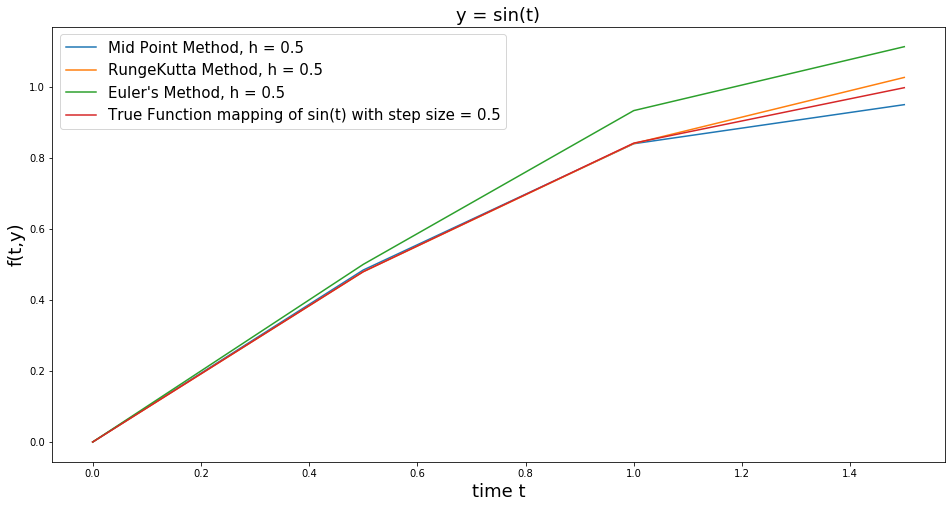

In [11]:
h = 0.5
time = np.arange(t0,tn,h)

fig = plt.figure(figsize = (16,8))
plt.plot(time,midPoint(time,h,[0]),label = "Mid Point Method, h = "+str(h))
plt.plot(time,RungeKutta(time,h,[0]),label = "RungeKutta Method, h = "+str(h))
plt.plot(time,Euler(time,h,[0]),label = "Euler's Method, h = "+str(h))
plt.plot(time,trueSolution2(time,None), label = "True Function mapping of sin(t) with step size = "+str(h))
plt.legend(loc='upper left',prop ={'size': 15})
plt.xlabel("time t",fontsize = 18)
plt.ylabel("f(t,y)",fontsize = 18)
plt.title("y = sin(t)",fontsize = 18)
plt.show()